In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Generate synthetic yield curve data
maturities = np.array([0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30])
yields = np.array([0.5, 0.6, 0.8, 1.2, 1.5, 2.0, 2.3, 2.5, 3.0, 3.2])

# Create a DataFrame
data = pd.DataFrame({'Maturity': maturities, 'Yield': yields})
print(data)


   Maturity  Yield
0      0.25    0.5
1      0.50    0.6
2      1.00    0.8
3      2.00    1.2
4      3.00    1.5
5      5.00    2.0
6      7.00    2.3
7     10.00    2.5
8     20.00    3.0
9     30.00    3.2


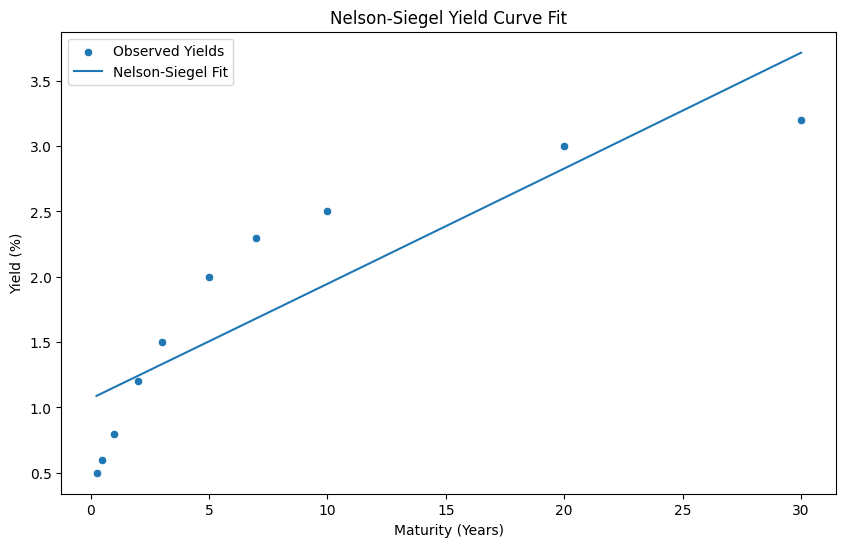

In [2]:
def nelson_siegel(maturity, beta0, beta1, beta2, tau):
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-maturity / tau)) / (maturity / tau))
    term3 = beta2 * (((1 - np.exp(-maturity / tau)) / (maturity / tau)) - np.exp(-maturity / tau))
    return term1 + term2 + term3

# Fit the model
params, _ = curve_fit(nelson_siegel, data['Maturity'], data['Yield'], p0=[0.03, -0.02, 0.02, 1.0])
data['NS_Fit'] = nelson_siegel(data['Maturity'], *params)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Maturity', y='Yield', data=data, label='Observed Yields')
sns.lineplot(x='Maturity', y='NS_Fit', data=data, label='Nelson-Siegel Fit')
plt.title('Nelson-Siegel Yield Curve Fit')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()


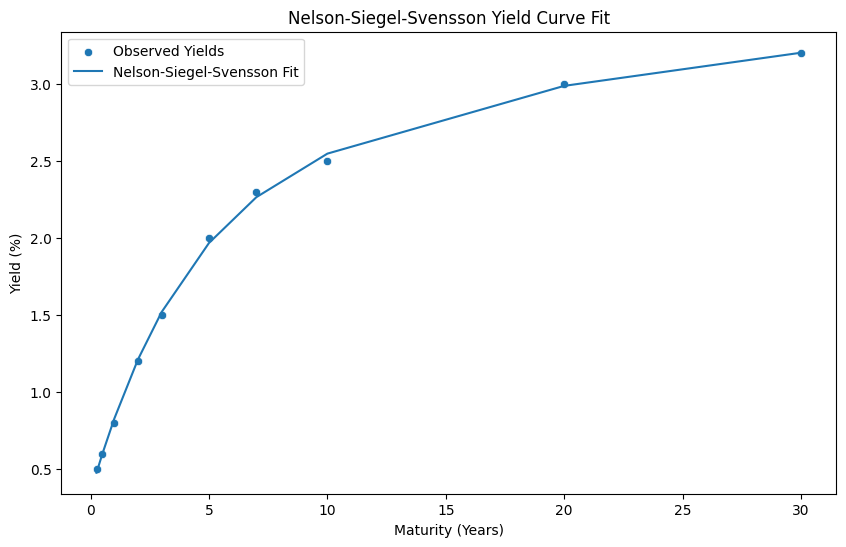

In [3]:
def nelson_siegel_svensson(maturity, beta0, beta1, beta2, beta3, tau1, tau2):
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-maturity / tau1)) / (maturity / tau1))
    term3 = beta2 * (((1 - np.exp(-maturity / tau1)) / (maturity / tau1)) - np.exp(-maturity / tau1))
    term4 = beta3 * (((1 - np.exp(-maturity / tau2)) / (maturity / tau2)) - np.exp(-maturity / tau2))
    return term1 + term2 + term3 + term4

# Fit the model
params, _ = curve_fit(nelson_siegel_svensson, data['Maturity'], data['Yield'], p0=[0.03, -0.02, 0.02, 0.01, 1.0, 2.0])
data['NSS_Fit'] = nelson_siegel_svensson(data['Maturity'], *params)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Maturity', y='Yield', data=data, label='Observed Yields')
sns.lineplot(x='Maturity', y='NSS_Fit', data=data, label='Nelson-Siegel-Svensson Fit')
plt.title('Nelson-Siegel-Svensson Yield Curve Fit')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()


In [6]:
from scipy.interpolate import CubicSpline, make_lsq_spline

# Cubic Spline
cs = CubicSpline(data['Maturity'], data['Yield'])
data['CS_Fit'] = cs(data['Maturity'])

# Corrected B-Spline
knots = np.concatenate(([maturities[0]] * 3, np.linspace(min(maturities), max(maturities), 5), [maturities[-1]] * 3))
degree = 3
bspline = make_lsq_spline(maturities, yields, knots, degree)
data['BS_Fit'] = bspline(maturities)

# Check if the columns are added correctly
print(data[['Maturity', 'Yield', 'CS_Fit', 'BS_Fit']])



   Maturity  Yield  CS_Fit    BS_Fit
0      0.25    0.5     0.5  0.494011
1      0.50    0.6     0.6  0.603078
2      1.00    0.8     0.8  0.810828
3      2.00    1.2     1.2  1.185553
4      3.00    1.5     1.5  1.507356
5      5.00    2.0     2.0  1.999134
6      7.00    2.3     2.3  2.300041
7     10.00    2.5     2.5  2.500000
8     20.00    3.0     3.0  3.000000
9     30.00    3.2     3.2  3.200000


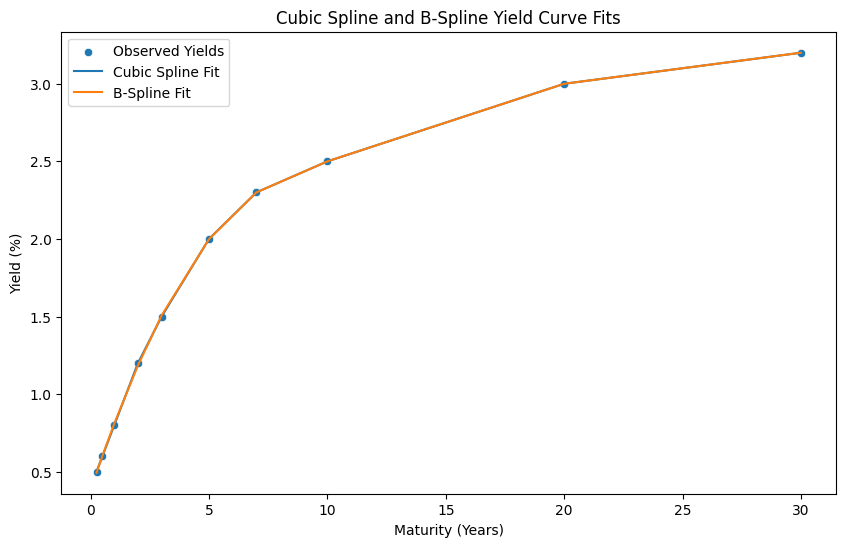

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Maturity', y='Yield', data=data, label='Observed Yields')
sns.lineplot(x='Maturity', y='CS_Fit', data=data, label='Cubic Spline Fit')
sns.lineplot(x='Maturity', y='BS_Fit', data=data, label='B-Spline Fit')
plt.title('Cubic Spline and B-Spline Yield Curve Fits')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each method
rmse_ns = np.sqrt(mean_squared_error(data['Yield'], data['NS_Fit']))
rmse_nss = np.sqrt(mean_squared_error(data['Yield'], data['NSS_Fit']))
rmse_cs = np.sqrt(mean_squared_error(data['Yield'], data['CS_Fit']))
rmse_bs = np.sqrt(mean_squared_error(data['Yield'], data['BS_Fit']))

print(f'RMSE - Nelson-Siegel: {rmse_ns:.4f}')
print(f'RMSE - Nelson-Siegel-Svensson: {rmse_nss:.4f}')
print(f'RMSE - Cubic Spline: {rmse_cs:.4f}')
print(f'RMSE - B-Spline: {rmse_bs:.4f}')


RMSE - Nelson-Siegel: 0.4462
RMSE - Nelson-Siegel-Svensson: 0.0255
RMSE - Cubic Spline: 0.0000
RMSE - B-Spline: 0.0065
